In [5]:
!pip install plotly --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 1.1 MB/s eta 0:00:0000:0100:01


## Graficos interativos

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 16 14:12:01 2021

@author: Samaung
"""
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

fig = plt.figure()
gráfico = fig.add_subplot(111)

start = time.time()

xs = []
ys = []


def atualiza(i):
    dados = open(
        "/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/db/dados_texto.txt",
        "r",
    ).read()
    linhas = dados.split("\n")
    for y in linhas:
        if len(y) > 0:
            ys.append(float(y))
            if len(xs) == 0:
                xs.append(time.time() - start)
            if len(ys) > len(xs):
                x = time.time() - start
                xs.append(x)
    gráfico.clear()
    gráfico.plot(xs, ys, "-o")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Valor digitado")
    plt.title("Valor digitado em função do tempo")
    ys.clear()


a = animation.FuncAnimation(fig, atualiza, interval=1)
plt.show()

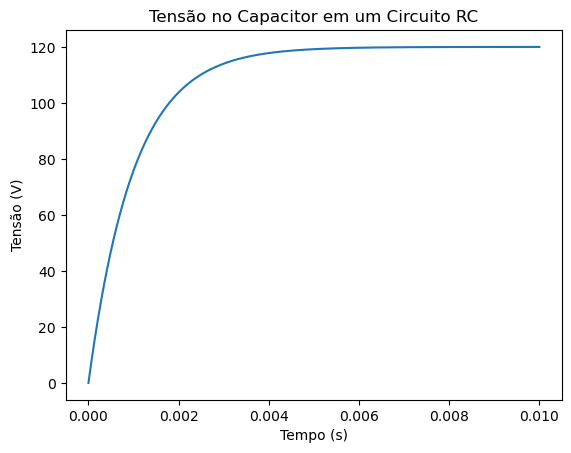

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do circuito RC
R = 1000  # Resistência (ohms)
C = 1e-6  # Capacitância (Farads)
V_fonte = 120  # Tensão da fonte (volts)

# Tempo de simulação
t = np.linspace(0, 0.01, 1000)

# Calcular a tensão no capacitor
tensao_capacitor = V_fonte * (1 - np.exp(-t / (R * C)))

# Plotar o gráfico da tensão no capacitor
plt.plot(t, tensao_capacitor)
plt.xlabel("Tempo (s)")
plt.ylabel("Tensão (V)")
plt.title("Tensão no Capacitor em um Circuito RC")
plt.show()

## Dashboard

In [8]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import plotly
import plotly.io as pio

def graficos_interativos_plot(numero_colunas, nome_coluna):
    df = pd.read_excel("")


    for i in range(numero_colunas):
        tabela= df[i]
        fig = px.histogram(tabela, x=nome_coluna)
        fig.show()
        print(tabela)

        # se o tipo da coluan for date entao
        
        #if (tablea.type) == "Date"


def desenha_grafico_plot(df,x,y,tempo):
    fig = go.Figure(data=[go.Bar(y=df[y], x=df[x])])

    fig = px.bar(
        df,
        x=x,
        y=y,
        color=x,
        animation_frame=tempo,
        animation_group=x,
        range_y=[0, 1200],
    )

    # save
    plotly.offline.plot(fig, filename="./grafico.html")
    pio.write_html(fig, file="./index.html", auto_open=True)

def main():
    # graficos_interativos_plot(3, "nome_coluna")
    df = pd.read_excel(
        "/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/db/consumo_eletrico_agua.xlsx",
        
    )
    colunas = df.columns
    print(colunas)

    df.dropna()
    display(df)

    consumo = df["consumo"]
    dias = df["dias"]
    estacao = df["estacao do ano"]

    # checa coluna temporal
    y =dias.dt.strftime("%d-%m-%y")
    

    desenha_grafico_plot(df, consumo, estacao, y)


main()

Index(['consumo', 'dias', 'estacao do ano', 'preco'], dtype='object')


,consumo,dias,estacao do ano,preco
0,380,2023-08-01,inverno,NaN
1,440,2023-09-01,inverno,NaN
2,560,2023-10-01,inverno,NaN
3,540,2023-11-01,inverno,NaN
4,690,2023-12-01,verao,NaN
5,590,2024-01-06,verao,NaN
6,560,2024-02-07,verao,NaN
7,640,2024-03-08,outono,NaN
8,560,2024-04-09,outono,NaN
9,640,2024-05-10,primavera,NaN


KeyError: "None of [Index(['inverno', 'inverno', 'inverno', 'inverno', 'verao', 'verao', 'verao',\n       'outono', 'outono', 'primavera', 'primavera', 'inverno'],\n      dtype='object')] are in the [columns]"

In [12]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import streamlit as st
import plotly.io as pio
import json

class dashPY:
    def __init__(self, arquivo_excel):
        self.df = pd.read_excel(arquivo_excel)

    def gerar_graficos_interativos(self, numero_colunas, nome_coluna):
        """
        Gera histogramas interativos para colunas selecionadas do DataFrame.

        Args:
            numero_colunas: Número de colunas para gerar gráficos.
            nome_coluna: Nome da coluna a ser usada para o eixo X dos histogramas.
        """
        for i in range(numero_colunas):
            tabela = self.df.iloc[:, i]
            fig = px.histogram(tabela, x=nome_coluna)
            fig.show()
            print(tabela)

    def desenhar_grafico_animado(self, x, y, tempo):
        """
        Cria um gráfico de barras animado com base nas colunas do DataFrame.

        Args:
            x: Nome da coluna para o eixo X.
            y: Nome da coluna para o eixo Y.
            tempo: Nome da coluna com valores temporais para a animação.
        """
        fig = go.Figure(data=[go.Bar(y=self.df[y], x=self.df[x])])

        fig = px.bar(
            self.df,
            x=x,
            y=y,
            color=x,
            animation_frame=tempo,
            animation_group=x,
            range_y=[0, 1200],
        )

        # Salva o gráfico como HTML
        plotly.offline.plot(fig, filename="./grafico.html")
        pio.write_html(fig, file="./index.html", auto_open=True)


def load_params(file_path):
    with open(file_path, "r") as file:
        params = json.load(file)
    return params


def main():
    params = load_params(
        r"/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/db/parameters.json"
    )
    st.title("Visualização de Dados Interativos")
    arquivo_excel = st.text_input("Insira o caminho do arquivo Excel:")

    if arquivo_excel:
        dash = dashPY(arquivo_excel)

        # Mostra as colunas do DataFrame
        colunas = dash.df.columns
        st.write("Colunas do DataFrame:", colunas)

        # Limpa dados NaN
        dash.df.dropna(inplace=True)
        st.dataframe(dash.df)

        # Gera gráficos interativos (opcional)
        numero_colunas = st.number_input(
            "Número de colunas para gráficos interativos:",
            min_value=1,
            max_value=len(colunas),
        )
        nome_coluna = st.text_input("Nome da coluna para o eixo X dos histogramas:")
        if st.button("Gerar Gráficos Interativos"):
            dash.gerar_graficos_interativos(numero_colunas, nome_coluna)

        # Gera gráfico animado
        consumo = dash.df["consumo"]
        dias = dash.df["dias"]
        estacao = dash.df["estacao do ano"]

        # Formata a coluna de datas
        y = dias.dt.strftime("%d-%m-%y")

        if st.button("Gerar Gráfico Animado"):
            dash.desenhar_grafico_animado(consumo, estacao, y)
    else:
        st.write("Por favor,  insira o caminho do arquivo Excel.")


if __name__ == "__main__":
    main()

2024-06-20 21:54:45.077 
  command:

    streamlit run /usr/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-06-20 21:54:45.084 Session state does not function when running a script without `streamlit run`
